## Test with df_test data and visualise 

#### Inputs:
- df_train01.csv
- df_test01.csv
- df_chunk_train01.csv
- df_chunk_test01.csv
- normalizer.pkl
- batcher_train_lite_model03.pkl: batcher object that training was done
- model03_epoch199.pkl: Latest model

#### Output:
- tester_model03_epoch199.pkl: tester object that keeps estimations and errors

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pickle
import sys
from importlib import reload
import logging
import torch

%matplotlib inline

In [2]:
sys.path.append('..')

#### Load data

In [3]:
df_train = pd.read_csv('../data/df_train01.csv',  parse_dates=['Datetime'])
df_chunk_train = pd.read_csv('../data/df_chunk_train01.csv')

In [4]:
df_test = pd.read_csv('../data/df_test01.csv',  parse_dates=['Datetime'])
df_chunk_test = pd.read_csv('../data/df_chunk_test01.csv')

#### Load normalizer

In [5]:
from lib import normalizing as nr

In [6]:
# normalizer = nr.Normalizer(meanstd=['temperature', 'apparent_temperature', 'dew_point',
#                                    'wind_speed', 'wind_gust'],
#                       minmax=['visibility', 'precip_intensity', 'Moisture',
#                               'Day', 'Hour', 'Month', 'Weekday'])

# df_train = normalizer.normalize(df_train, init=True)

In [88]:
with open('../data/normalizer.pkl' ,'rb') as f:
    normalizer = pickle.load(f)

#### Load light batcher object

In [8]:
from lib import batching as bt

In [9]:
bt = reload(bt)

In [12]:
with open('../data/batcher_train_lite_model03.pkl', 'rb') as f:
    batcher_train = pickle.load(f)

#### Load the trained LSTM model

In [13]:
from lib import lstm

In [14]:
lstm = reload(lstm)

In [15]:
model = torch.load('../data/model03_epoch199.pkl', map_location=torch.device('cpu'))

/home/halo/env/env01/lib/python3.8/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'lib.lstm.LSTM' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [18]:
model.move_cpu()

#### Set test parameters

In [19]:
test_period = 24
init_len = 168
out_filter_len = 18

#### Create a tester object with df_test

In [20]:
from lib import testing as ts

In [21]:
ts = reload(ts)

In [22]:
tester = ts.TesterMain(df_test,
                       df_chunk_test,
                       batcher_train.inp_time_len,
                       init_len,
                       test_period,
                       out_filter_len,
                       batcher_train.col_feats_prev,
                       batcher_train.col_feats_current,
                       normalizer
                      )

In [23]:
tester.init()

In [24]:
tester.run(model)

MAPE IS: 0.07599361212614811


In [87]:
tester.visualise_rand()

In [ ]:
with open('../data/tester_model03_epoch199.pkl', 'wb') as f:
    pickle.dump(tester, f)

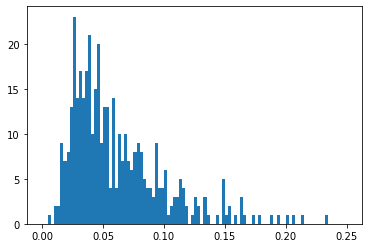

In [52]:
plt.hist(tester.mapes, bins=100, range=[0,0.25]);

In [53]:
inds_sorted = np.argsort(tester.mapes)

In [54]:
ii = -1

In [78]:
ii += 1
# ii -= 2
tester.testers[inds_sorted[ii]].visualise()